In [18]:
from cytoflow import *
import openpyxl
import os.path
%matplotlib inline
# matplotlib.use('cairo')
from cycler import cycler
default_cycler = (cycler(color=['b', 'g', 'r', 'y']) +
                  cycler(linestyle=['-', '-', '-', '-']))
                #   cycler(linestyle=['-', '--', ':', '-.']))
dpi = 160
matplotlib.rc('lines', linewidth=4)
matplotlib.rc('axes', prop_cycle=default_cycler)
matplotlib.rc('figure', dpi = dpi)
matplotlib.rcParams['axes.edgecolor'] = "black"
matplotlib.rcParams['axes.axisbelow'] = "False"
# matplotlib.rc('figure', tick_params = {'axis':'y', 'colors':'red'})
import numpy as np
import pandas as pd

cell_type = "PC-12"

# GFP_SPLIT FOR LIVECELL GATING
# GFP_SPLIT = 6549.799136441116
GFP_SPLIT = 6e3 # HEK-293T, COLO-205, A549 , HEP-G2, PC-12
# GFP_SPLIT = 1e4 # PC12
# GFP_SPLIT = 2E4 # ARPE-19
# GFP_SPLIT = 40000 # HEPG2

# batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\CMP_DIFF_CELLINE\ARPE-19\experiment.xlsx"
# batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\CMP_DIFF_CELLINE\HEK-293T\experiment.xlsx"
# batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\CMP_DIFF_CELLINE\A549\experiment.xlsx"
batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\CMP_DIFF_CELLINE\COLO205\experiment.xlsx"
# batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\CMP_DIFF_CELLINE\HEPG2\experiment.xlsx"
# batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\CMP_DIFF_CELLINE\PC12\experiment.xlsx"
# batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\CMP_DIFF_CELLINE\Y79\experiment.xlsx"
# batch_file = r"D:\EXPERIMENT_DATA\flowcytometry\PRE-FOR-NEWBATCH-ER\experiment.xlsx"
# batch_file = r"D:\EXPERIMENT_DATA\DATA\Sucrose Concentration Optimize\Flow Cytometry\experiment.xlsx"

file_path = '\\'.join(batch_file.split('\\')[:-1])



# Setting the gate for specific  cell line

In [19]:
gating_cell = {"A549":[(7297082.794431693, 316914.0553657324),
                           (12120084.625937257, 613964.7833836579),
                           (14942277.83738593, 1128630.0643089763),
                           (14521054.97000553, 2964542.3017303664),
                           (7339205.081169733, 1629702.2280048735),
                           (4959295.880470479, 703732.0938050047),
                           (6201903.339242655, 333991.4176981784),
                           (6201903.339242655, 333991.4176981784)],
             "HEK-293T": [(6797320.38458262, 167266.34977414017), 
                           (10803978.861808926, 419872.9111308231),
                           (12768633.790796343, 1406197.551321085),
                           (5126590.2087508, 900294.2682135432),
                           (3223814.1751645627, 506222.83285774314),
                           (3022707.765110732, 174584.01660672482),
                           (5219408.551852568, 141873.0691330551)],
             "COLO-205": [(7309237.304001976, 339383.3053939393),
                           (12350325.297540886, 487543.9429517874),
                           (15221831.11664533, 1445385.3078631943),
                           (16115188.482588934, 3930932.4437393406),
                           (10138202.296156723, 2931828.963960846),
                           (6437150.351533219, 1078019.6735321367),
                           (5969201.255086569, 410296.59501327976)],
             "HEP-G2": [(6673479.128330441, 257528.38906081932),
                           (15179662.52861045, 559688.5822170988),
                           (16285466.37064685, 4752290.909010304),
                           (9395457.816420045, 3863705.311353983),
                           (5418817.076789141, 1135275.962205632),
                           (4993507.90677514, 403279.668646571)],
             "PC-12": [(6185446.550062934, 156305.62118007537),
                           (11722120.405212024, 385758.9921003826),
                           (15237803.043272471, 1597337.9274844835),
                           (9364297.318608608, 2329109.1477728947),
                           (4880223.055693187, 1085911.9840049648),
                           (3596051.553168112, 312533.58137409046)],
             "Y79": [(4613094.767950856, 126037.19329750417),
                           (11044123.704159938, 274235.507775918),
                           (13923287.286479484, 937106.4992997753),
                           (9846714.55076536, 3122936.012830043),
                           (3429139.649987678, 840609.0526229433),
                           (3388777.543693479, 189839.74621607029)],
            "ARPE-19": [(8132010.666789755, 1904245.2865378514),
                           (4830287.227716031, 935329.3744858014),
                           (5702693.827471284, 356577.3798364702),
                           (12426935.465584844, 425186.155528257),
                           (16533957.304432645, 751964.2088657115),
                           (16184994.664530545, 2650955.8899838417)],
             }


In [20]:
df = pd.read_excel(io=batch_file)

SAMPLE_NAME_LIST=df[~df['Sample'].str.contains('blank', case=False)]['Sample'].unique().tolist()
print(SAMPLE_NAME_LIST)
print(f"Sample: {str(SAMPLE_NAME_LIST)}")
col_title = list(df.columns.drop('Unnamed: 0'))

col_dict_set = dict(map(lambda x,y: (x,y), col_title,['category']*len(col_title)))

dict_list = df.drop(columns=['Unnamed: 0']).astype(str).to_dict(orient='records')

print("\n".join([str(x) for x in dict_list]))

tubes_from_file = df.apply(lambda row, dict_list: Tube(file=os.path.join(file_path, row['Unnamed: 0']), 
                                                       conditions=dict_list[row.name]), 
                                                       axis=1, args=(dict_list, )).tolist()
# SAMPLE_NAME_LIST = df['Sample']
op_0 = ImportOp(
    conditions=col_dict_set,
    tubes=tubes_from_file,
    channels={
        # 'APC-A': 'APC_A',
        # 'APC-H': 'APC_H',
        'FITC-A': 'FITC_A',
        # 'FITC-H': 'FITC_H',
        'FSC-A': 'FSC_A',
        # 'FSC-H': 'FSC_H',
        # 'PE-A': 'PE_A',
        # 'PE-H': 'PE_H',
        # 'PerCP-A': 'PerCP_A',
        # 'PerCP-H': 'PerCP_H',
        'SSC-A': 'SSC_A',
        # 'SSC-H': 'SSC_H',
        'Time': 'Time',
        'Width': 'Width'
    })
ex_0 = op_0.apply()


# op_1 = AutofluorescenceOp(
#     channels=['FITC_A'],
#     blank_file=
#     'D:/EXPERIMENT_DATA/flowcytometry/PRE-FOR-NEWBATCH-ER/A01_BLANK-batch-1.fcs'
# )

# op_1.estimate(ex_0)
# ex_0 = op_1.apply(ex_0)
'''
--------
>>> import cytoflow as flow
>>> from fcsparser import fcsparser
>>> ex = flow.Experiment()
>>> ex.add_condition("Time", "float")
>>> ex.add_condition("Strain", "category")
>>> tube1, _ = fcparser.parse('CFP_Well_A4.fcs')
>>> tube2, _ = fcparser.parse('RFP_Well_A3.fcs')
>>> ex.add_events(tube1, {"Time" : 1, "Strain" : "BL21"})
>>> ex.add_events(tube2, {"Time" : 1, "Strain" : "Top10G"})
        
'''

['OPT-FR', 'MS-FR', 'LIPO-FR', 'MS-FD', 'OPT-FD']
Sample: ['OPT-FR', 'MS-FR', 'LIPO-FR', 'MS-FD', 'OPT-FD']
{'Sample': 'OPT-FR', 'Replicate': '1', 'S_name': 'OPT-FR-R1'}
{'Sample': 'BLANK', 'Replicate': '1', 'S_name': 'BLANK-R1'}
{'Sample': 'OPT-FR', 'Replicate': '2', 'S_name': 'OPT-FR-R2'}
{'Sample': 'OPT-FR', 'Replicate': '3', 'S_name': 'OPT-FR-R3'}
{'Sample': 'MS-FR', 'Replicate': '1', 'S_name': 'MS-FR-R1'}
{'Sample': 'MS-FR', 'Replicate': '2', 'S_name': 'MS-FR-R2'}
{'Sample': 'MS-FR', 'Replicate': '3', 'S_name': 'MS-FR-R3'}
{'Sample': 'LIPO-FR', 'Replicate': '1', 'S_name': 'LIPO-FR-R1'}
{'Sample': 'LIPO-FR', 'Replicate': '2', 'S_name': 'LIPO-FR-R2'}
{'Sample': 'LIPO-FR', 'Replicate': '3', 'S_name': 'LIPO-FR-R3'}
{'Sample': 'MS-FD', 'Replicate': '1', 'S_name': 'MS-FD-R1'}
{'Sample': 'MS-FD', 'Replicate': '2', 'S_name': 'MS-FD-R2'}
{'Sample': 'MS-FD', 'Replicate': '3', 'S_name': 'MS-FD-R3'}
{'Sample': 'OPT-FD', 'Replicate': '1', 'S_name': 'OPT-FD-R1'}
{'Sample': 'OPT-FD', 'Replicate'

d:\MyScoopApps\apps\miniconda-cn\current\envs\cytoflow\lib\site-packages\cytoflow\operations\import_op.py:400: CytoflowWarning: The data range $PnR doesn't match the data bits $PnB for channel FITC-A, masking out 8 bits
d:\MyScoopApps\apps\miniconda-cn\current\envs\cytoflow\lib\site-packages\cytoflow\operations\import_op.py:400: CytoflowWarning: The data range $PnR doesn't match the data bits $PnB for channel FSC-A, masking out 8 bits
d:\MyScoopApps\apps\miniconda-cn\current\envs\cytoflow\lib\site-packages\cytoflow\operations\import_op.py:400: CytoflowWarning: The data range $PnR doesn't match the data bits $PnB for channel SSC-A, masking out 8 bits
d:\MyScoopApps\apps\miniconda-cn\current\envs\cytoflow\lib\site-packages\cytoflow\operations\import_op.py:400: CytoflowWarning: The data range $PnR doesn't match the data bits $PnB for channel Time, masking out 8 bits
d:\MyScoopApps\apps\miniconda-cn\current\envs\cytoflow\lib\site-packages\cytoflow\operations\import_op.py:400: CytoflowWarni

'\n--------\n>>> import cytoflow as flow\n>>> from fcsparser import fcsparser\n>>> ex = flow.Experiment()\n>>> ex.add_condition("Time", "float")\n>>> ex.add_condition("Strain", "category")\n>>> tube1, _ = fcparser.parse(\'CFP_Well_A4.fcs\')\n>>> tube2, _ = fcparser.parse(\'RFP_Well_A3.fcs\')\n>>> ex.add_events(tube1, {"Time" : 1, "Strain" : "BL21"})\n>>> ex.add_events(tube2, {"Time" : 1, "Strain" : "Top10G"})\n        \n'

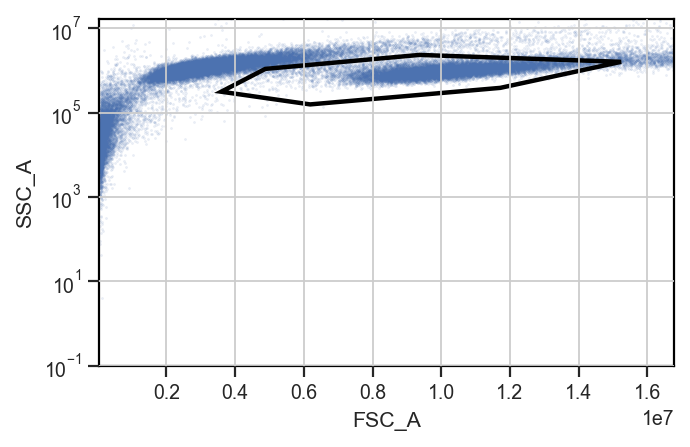

In [21]:

op_1 = PolygonOp(name='Normal_cell', 
                 xchannel='FSC_A',
                 ychannel='SSC_A',
                 vertices=gating_cell[cell_type],
                 yscale='log')

ex_1 = op_1.apply(ex_0)

BLANK_NAME = "BLANK"
op_1.default_view(subset=f'(Sample == "{BLANK_NAME}")').plot(ex_0,
                                                   alpha=0.15,
                                                   s=0.5,
                                                   marker='.')     

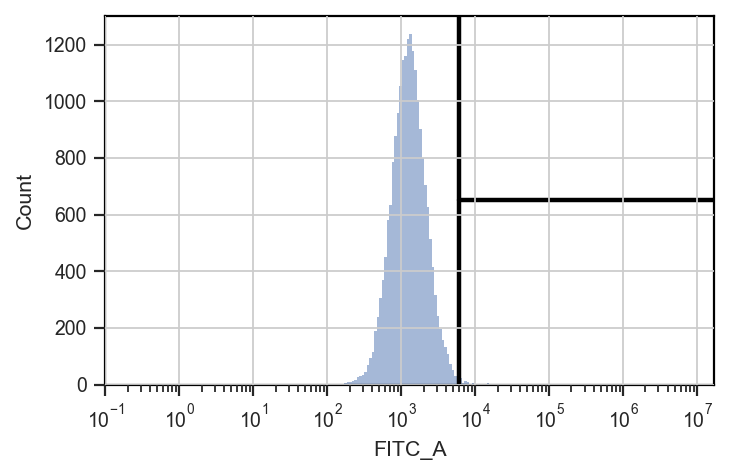

In [22]:


op_2 = RangeOp(name='GFP',
               channel='FITC_A',
               low=GFP_SPLIT,
            #    low=4156.839295790304,
               high=72000000)


ex_2 = op_2.apply(ex_1)
import matplotlib.pyplot as plt
# plt.axhline(y=1.0, color="black", linestyle="--")
op_2.default_view(
    scale='log',
    subset=f'(Sample == "{BLANK_NAME}") and (Normal_cell == True)').plot(ex_1)


# plt.axhline(y=200.0,xmin = 0.6,c="r",ls="--",lw=2)

# Transfection Efficiency Calculation

In [23]:
op_3 = ChannelStatisticOp(name='GFP_COUNT',
                          channel='FITC_A',
                          function=len,
                          statistic_name='Count',
                          by=[
                            # 'Day', 
                            'GFP', 
                            'Sample', 
                            # 'S_name'
                          ],
                          subset='(Normal_cell == True)')

ex_3 = op_3.apply(ex_2)

from pandas import Series
op_4 = TransformStatisticOp(name='TE',
                            statistic=('GFP_COUNT', 'Count'),
                            function=lambda a: Series(a / a.sum()) * 100.0,
                            statistic_name='Percentage',
                            by=[
                                # 'Day', 
                                'Sample', 
                                # 'S_name'
                            ])

ex_4 = op_4.apply(ex_3)


#  Export Transfection Efficiency and Fluorescence Intensity

In [24]:
import pathlib

from numpy import mean
op_FL = ChannelStatisticOp(name='FL',
                          channel='FITC_A',
                          function=mean,
                          statistic_name='Mean',
                          by=['S_name'],
                          subset='(Normal_cell == True)')

ex_FL = op_FL.apply(ex_2)

import pathlib

# print(data_df)



op_pre = ChannelStatisticOp(name='GFP_COUNT',
                          channel='FITC_A',
                          function=len,
                          statistic_name='Count',
                          by=[
                            # 'Day', 
                            'GFP', 
                            # 'Sample', 
                            'S_name'
                          ],
                          subset='(Normal_cell == True)')

ex_for_each = op_pre.apply(ex_2)

from pandas import Series
op_each = TransformStatisticOp(name='TE',
                            statistic=('GFP_COUNT', 'Count'),
                            function=lambda a: Series(a / a.sum()) * 100.0,
                            statistic_name='Percentage',
                            by=[
                                # 'Day', 
                                # 'Sample', 
                                'S_name'
                            ])

ex_each = op_each.apply(ex_for_each)




# print(ex_4.statistics[("TE", "Percentage")])
data_df_FL = pd.DataFrame(ex_FL.statistics[('FL', 'Mean')])
data_df = pd.DataFrame(ex_4.statistics[("TE", "Percentage")])
data_df_each = pd.DataFrame(ex_each.statistics[("TE", "Percentage")])
print(data_df_each)
p = pathlib.Path(batch_file)
# print()
writer_FL = pd.ExcelWriter(p.parent.joinpath("FL_ALL.xlsx"))


writer = pd.ExcelWriter(p.parent.joinpath("Percentage_data.xlsx"))
writer_each = pd.ExcelWriter(p.parent.joinpath("Percentage_data_each.xlsx"))


#include<stdio.h>

# writer_each.book=openpyxl.Workbook()
data_df_FL.to_excel(writer_FL, "FL")
data_df.to_excel(writer, "Percentage")
data_df_each.to_excel(writer_each, "Percentage")
writer.save()
writer_each.save()
writer_FL.save()

                  GFP_COUNT : Count
GFP   S_name                       
False BLANK-R1            99.601809
      LIPO-FR-R1          69.618209
      LIPO-FR-R2          72.417502
      LIPO-FR-R3          66.840210
      MS-FD-R1            52.845610
      MS-FD-R2            55.453531
      MS-FD-R3            38.186133
      MS-FR-R1             6.826167
      MS-FR-R2             6.834594
      MS-FR-R3             7.639401
      OPT-FD-R1           12.866918
      OPT-FD-R2           10.502075
      OPT-FD-R3           12.330767
      OPT-FR-R1            5.586549
      OPT-FR-R2            3.940052
      OPT-FR-R3            6.603624
True  BLANK-R1             0.398191
      LIPO-FR-R1          30.381791
      LIPO-FR-R2          27.582498
      LIPO-FR-R3          33.159790
      MS-FD-R1            47.154390
      MS-FD-R2            44.546469
      MS-FD-R3            61.813867
      MS-FR-R1            93.173833
      MS-FR-R2            93.165406
      MS-FR-R3            92

In [25]:
# Kde1DView(channel='FITC_A',
#           scale='log',
#           subset='(Normal_cell == True) and (Sample == "M01")',
#           huefacet='Name').plot(ex_4, plot_name='4', shade=False)


RT


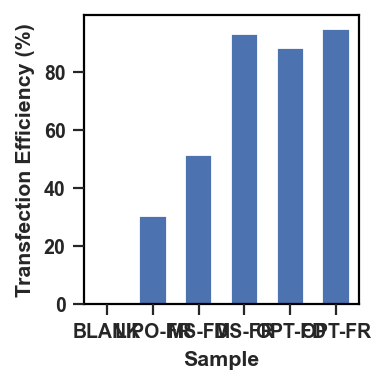

In [26]:
from re import T


plot_name_list = ['RT']
# aspect_for_chart =  1.8 #图表纵横比
aspect_for_chart =  1 #图表纵横比
x_lim = (0, 100)
for each_temp in plot_name_list:
    print(each_temp)
    BarChartView(statistic=('TE', 'Percentage'),
                variable='Sample',
                # subset='(GFP == True)',
                # xfacet='Sample'
                ).plot(ex_4,
                        # plot_name=each_temp,
                        plot_name= True,
                        height=2.5,
                        ylabel='Transfection Efficiency (%)', 
                        # title= f"Temperature: {each_temp}\n",
                        aspect = aspect_for_chart, 
                        width = 0.6)
    ax=plt.gca()
    # make all ticks to bold
    plt.setp(ax.get_xticklabels(), fontweight="bold")
    plt.setp(ax.get_yticklabels(), fontweight="bold")
    # make label to bold
    ax.set_xlabel(ax.get_xlabel(), fontweight="bold")
    ax.set_ylabel(ax.get_ylabel(), fontweight="bold")
    plt.grid(False)
plt.savefig(os.path.join(file_path, f"TE_overview.tif"), dpi=dpi)



In [27]:
# df_rr = df_r[df_r['GFP']==True]
data_df_each = pd.DataFrame(ex_each.statistics[("TE", "Percentage")])
# data_df = pd.DataFrame(ex_4.statistics[("TE", "Percentage")])
# print(data_df)
data_df_each = data_df_each.reset_index()
df_rr = data_df_each[data_df_each['GFP']==True]
print(df_rr)
# df_rr[["S_name", "GFP_COUNT : Count"]].to_excel(os.path.join(file_path, f"Transfection_Eff.xlsx"))
# lipo = df_rr[df_rr['S_name'].str.contains('lipo', case=False)]['GFP_COUNT : Count']
# print("{:.2f}".format(lipo.mean()), "±", "{:.2f}".format(lipo.std()))

# SAMPLE_NAME_LIST=df[~df['Sample'].str.contains('blank', case=False)]['Sample'].unique().tolist()
# print(df_rr)

     GFP      S_name  GFP_COUNT : Count
16  True    BLANK-R1           0.398191
17  True  LIPO-FR-R1          30.381791
18  True  LIPO-FR-R2          27.582498
19  True  LIPO-FR-R3          33.159790
20  True    MS-FD-R1          47.154390
21  True    MS-FD-R2          44.546469
22  True    MS-FD-R3          61.813867
23  True    MS-FR-R1          93.173833
24  True    MS-FR-R2          93.165406
25  True    MS-FR-R3          92.360599
26  True   OPT-FD-R1          87.133082
27  True   OPT-FD-R2          89.497925
28  True   OPT-FD-R3          87.669233
29  True   OPT-FR-R1          94.413451
30  True   OPT-FR-R2          96.059948
31  True   OPT-FR-R3          93.396376


     GFP   Sample  GFP_COUNT : Count
6   True    BLANK           0.398191
7   True  LIPO-FR          30.379088
8   True    MS-FD          51.180585
9   True    MS-FR          92.893656
10  True   OPT-FD          88.092650
11  True   OPT-FR          94.824026
['OPT-FR', 'MS-FR', 'LIPO-FR', 'MS-FD', 'OPT-FD']


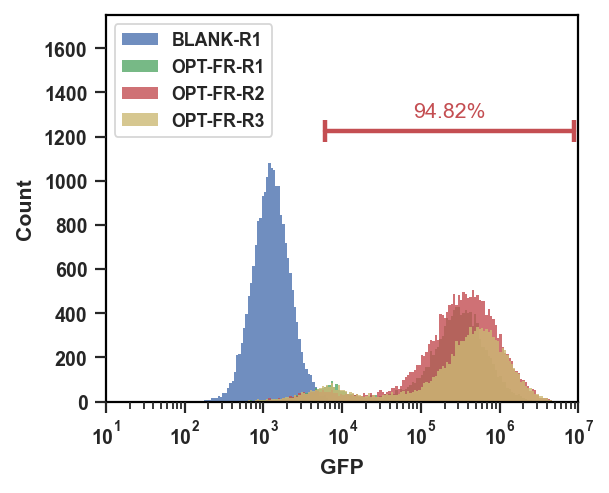

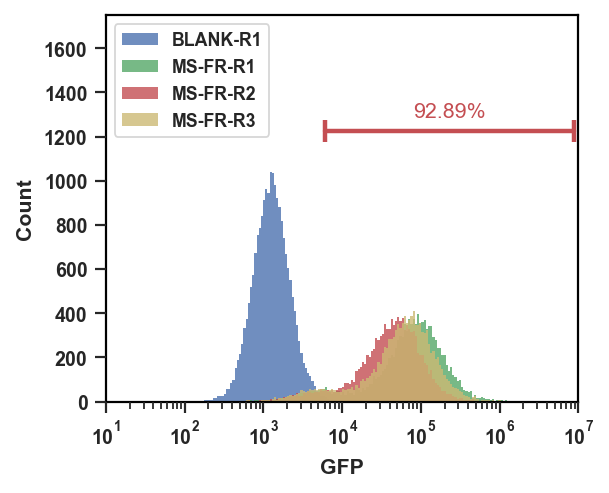

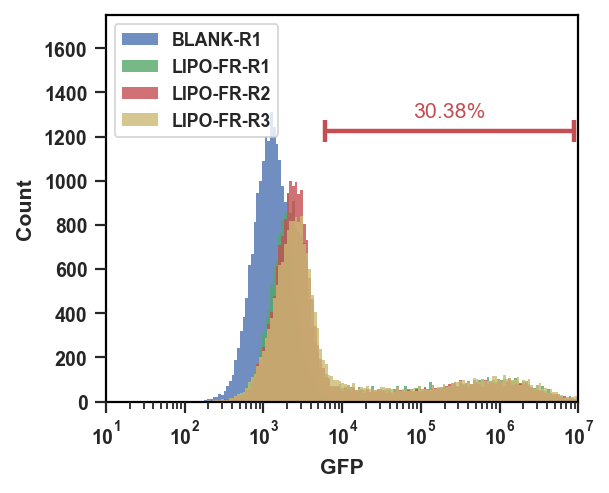

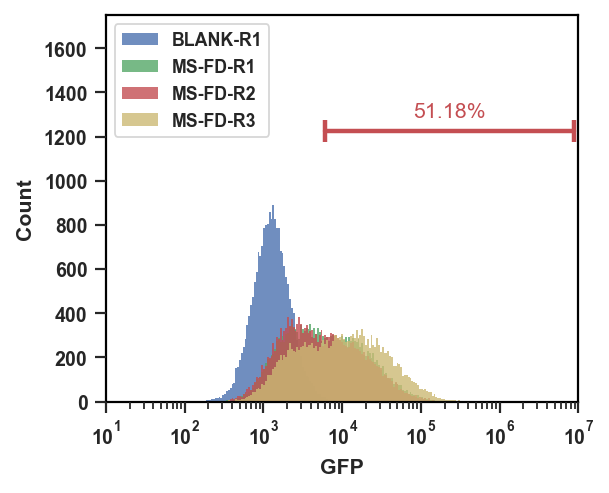

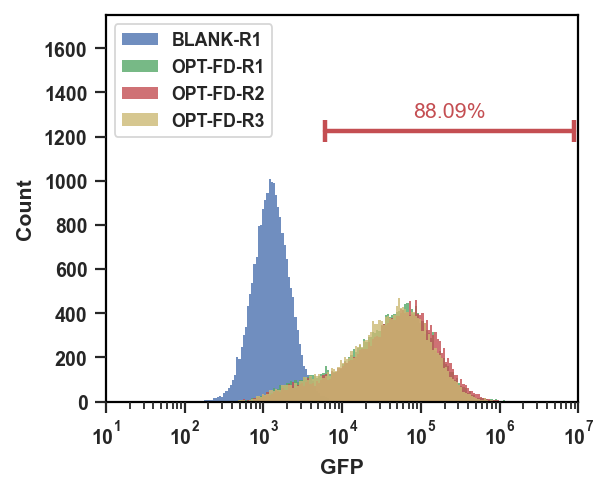

In [28]:
data_df = pd.DataFrame(ex_4.statistics[("TE", "Percentage")])
# plt.rcParams['savefig.antialiased'] = False

import math
df_r = data_df.reset_index()

# print(data_df['GFP'] == True)
df_rr = df_r[df_r['GFP']==True]
print(df_rr)

x_lim = (10, 1e7)
# x_lim = (10, 70000000.0)
y_lim = (0, 1750)
print(SAMPLE_NAME_LIST)
for sample in SAMPLE_NAME_LIST:  

    perc = df_rr[df_rr['Sample']==sample]['GFP_COUNT : Count'].values[0]

    HistogramView(channel='FITC_A', 
    scale='log',
    subset=f'(Sample == "{BLANK_NAME}" or Sample == "{sample}") and (Normal_cell == True)',
            huefacet='S_name').plot(ex_1,
                                    histtype='bar',
                                    num_bins=200,
                                    linestyle="solid",
                                    linewidth=0,
                                    # color="black",
                                    # step=1,
                                    alpha=0.8,
                                    aspect = 1.3, 
                                    xlabel = "GFP",
                                    # title="test",
                                    huelabel=' ',
                                    # legend=False,
                                    lim=x_lim,
                                    )
    # print(asd)
    # y_lim = (0, 3)
    # Kde1DView(channel='FITC_A', 
    #     scale='log', 
    #     subset=f'(Sample == "BLANK" or Sample == "{sample}") and (Normal_cell == True)',
    #         huefacet='S_name').plot(ex_1, 
    #             # histtype="step",
    #             # num_bins=1000,
    #             linestyle="solid",
    #             linewidth=1.1,
    #             # color="black",
    #             # step=1,
    #             kernel= "epanechnikov",
    #             alpha=0,
    #             aspect = 1.25, 
    #             xlabel = "GFP",
    #             # title="test",
    #             huelabel=' ',
    #             # legend=False,
    #             lim=x_lim,
    #             )
    # print(perc)
    # fig = plt.gcf()


    '''``gaussian`` (the default)
                - ``tophat``
                - ``epanechnikov``
                - ``exponential``
                - ``linear``
                - ``cosine``'''
    line_range_left = (math.log(GFP_SPLIT, 10) - math.log(x_lim[0], 10)) / (math.log(x_lim[1], 10)-math.log(x_lim[0], 10))

    line_range = (line_range_left, 0.99)
        
    y_point_position = 0.7
    y_point_w = 0.05
    
    plt.ylim(y_lim[0], y_lim[1])
    plt.grid(False)
    plt.legend(loc='upper left', prop={'weight': 'bold', 'size': 8}) # 图注位置和字体设置
    plt.text(pow(10, math.log(x_lim[0], 10) + (math.log(x_lim[1], 10)-math.log(x_lim[0], 10)) * (sum(line_range)/2)),
        y_lim[1] * y_point_position * 1.05, "{:.2f}%".format(perc), 
        horizontalalignment='center', 
        color='r')  # 百分比文本
    plt.axhline(y=y_lim[1]*y_point_position, 
        xmin = line_range[0], 
        xmax = line_range[1], 
        c="r",
        ls="-",
        lw=2,
        marker="|",
        markersize=10,
        markeredgewidth=2) # 画%线  
    ax=plt.gca()
    # make all ticks to bold
    plt.setp(ax.get_xticklabels(), fontweight="bold")
    plt.setp(ax.get_yticklabels(), fontweight="bold")
    # make label to bold
    ax.set_xlabel(ax.get_xlabel(), fontweight="bold")
    ax.set_ylabel(ax.get_ylabel(), fontweight="bold")
    plt.tight_layout()
    plt.savefig(os.path.join(file_path, f"Sample-{sample}.tif"), dpi=dpi)
    plt.show()